<img width=150 src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/200px-NumPy_logo.svg.png"></img>

# Part.2-1-01 NumPy 陣列的基本操作

# 0. 安裝與載入 NumPy

安裝 NumPy 可以使用 `pip install numpy` 或是 `pip3 install numpy`，在 Anaconda 環境下的話，執行 `conda install numpy` 進行安裝。

In [1]:
!pip3 install numpy

載入 NumPy

In [2]:
import numpy as np

目前安裝的 NumPy 版本

In [3]:
np.__version__

'1.19.2'

## 1. 建立 NumPy array (陣列)

### 1.1 `array()` 函式

使用 `array()` 函式，可將 Python list 或元組 (tuple) 的值建立為 NumPy array。

In [4]:
# 使用 list
a = np.array([1, 2, 3, 4, 5]) #一維陣列

In [8]:
a = np.array([(1, 2, 3, 4, 5),(1, 2, 3, 4, 5)]) #二維陣列

In [11]:
a = np.array([(1, 2, 3, 4, 5),(1, 2, 3, 4, 5), (6.1, 6.2, 6.3, 6.4, 6.5)], dttype= float) #三維陣列

In [12]:
a

array([[1. , 2. , 3. , 4. , 5. ],
       [1. , 2. , 3. , 4. , 5. ],
       [6.1, 6.2, 6.3, 6.4, 6.5]])

In [13]:
# 使用元組
b = np.array((6, 7, 8))

可以看到建立的陣列型別為 numpy.ndarray

In [14]:
type(a), type(b)

(numpy.ndarray, numpy.ndarray)

下列的語法則會造成錯誤

In [17]:
np.array(1, 2, 3)

TypeError: array() takes from 1 to 2 positional arguments but 3 were given

### 1.2 使用 `arange()` 與 `linspace()` 函式產生等差一維陣列

要用序列數字產生陣列元素的話，可以使用 `arange()` 函式，`arange()` 函式引數如下，其中結束值為必輸，起始值、間隔值非必輸。產生的序列數字包含起始值但不包含結束值，也就是 `[start, stop)` 的表示方式。

```python
numpy.arange([start, ]stop, [step, ]dtype=None)
```

產生的元素，會是依照起始值、結束值、間隔值做等差的數字序列。

NumPy 陣列支援的資料型別 (dtype) 如下表：

||型別|
|---|---|
|signed整數|int8, int16, int32, int64|
|unsigned整數|uint8, uint16, uint32, uint64|
|浮點數|float16, float32, float64, float128|
|布林值|bool|

In [18]:
# 產生 0 - 9 十個數字元素
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
np.arange(1, 10, 3) #(起始值, 結束值, 間格)

array([1, 4, 7])

In [19]:
# 產生 2, 4, 6, 8 數字元素
np.arange(2, 10, 2)

array([2, 4, 6, 8])

下例是浮點數序列的示範。

In [21]:
np.arange(1.0, 3.0, 0.5, dtype='float64')

array([1. , 1.5, 2. , 2.5])

當在 `arange()` 使用非整數的間隔值時，有可能會產生不一致的結果，如下例會有時會包含結束值但有時候不會。這時候可以考慮使用 `linspace()` 函式。

In [24]:
a = np.arange(0.13, 0.16, step=0.01)
print("沒有包含結束值：", a)
b = np.arange(0.12, 0.16, step=0.01)
print("包含結束值：", b)

沒有包含結束值： [0.13 0.14 0.15]
包含結束值： [0.12 0.13 0.14 0.15 0.16]


跟 `arange()` 的用法很類似，呼叫 `linspace()` 時的引數有啟始值、結束值、資料型別 `dtype`。

與 `arange()` 不同的地方在於起始跟結束值都是必輸，產生該範圍內等分的數值，另外對於產生的元素也可以有更多的控制：
- `num`：產生元素數
- `endpoint`:是否包含結束值
- `retstep`：是否要顯示間隔值，間隔值是依照啟始值、結束值、產生元素數計算而得
- `axis`：產生依據的軸

`linspace()` 函式的定義：

```python
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
```

下面 `linspace()` 的例子跟上面 `arange()` 的例子會有完全相同的產出。
```python
np.arange(2, 10, 2)
```

In [25]:
np.linspace(2, 10, num=4, endpoint=False)

array([2., 4., 6., 8.])

In [26]:
# 顯示間值值
np.linspace(2.0, 3.0, num=5, retstep=True)

(array([2.  , 2.25, 2.5 , 2.75, 3.  ]), 0.25)

### 1.3 建立多維陣列

要建立多維陣列，簡單的理解方式就是陣列中的元素也是陣列，呼叫 `array()` 函式時，只要將 list 中的元素也是 list 傳入即可。下面的例子是建立二維陣列。

In [27]:
a = np.array([[1, 2, 3], [4, 5, 6]])

使用 `print()` 函式可將陣列印出

In [28]:
print(a)

[[1 2 3]
 [4 5 6]]


使用 `shape` 屬性，可以查看多維陣列的形狀。如下例 a 陣列是一個 2 $\times$ 3 的二維陣列。

In [29]:
a.shape

(2, 3)

下列例子是建立三維陣列，也可以理解為 2 個 4 $\times$ 3 的二維陣列排在一起。

In [30]:
b = np.array([[[1, 2, 3], [4, 5, 6],
              [7, 8, 9], [10, 11, 12]],
              [[1, 2, 3], [4, 5, 6],
              [7, 8, 9], [10, 11, 12]]])

In [31]:
print(b)

[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]
  [10 11 12]]

 [[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]
  [10 11 12]]]


In [32]:
b.shape

(2, 4, 3)

要查看多維陣列的維度數目，可以查看陣列的 `ndim` 屬性。

In [34]:
b.ndim

3

多維陣列建立時須注意各維度是否一致，否則如下例會產生預期之外的結果。

In [35]:
np.array([[[1, 2, 3], [4, 5, 6],
              [7, 8, 9], [10, 11, 12]],
              [[1, 2, 3], [4, 5, 6]]])

<ipython-input-35-f231fa882b32>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([[[1, 2, 3], [4, 5, 6],


array([list([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]),
       list([[1, 2, 3], [4, 5, 6]])], dtype=object)

### 1.4 `zeros()`、`ones()`、`empty()`

呼叫 `zeros()`、`ones()`函式，可以依照傳入的形狀引數，建立元素全為 0、全為 1 的陣列。

`empty()` 則是不需要給定起始值，但是可以建立給定形狀的陣列，元素值則會隨機給定。

In [36]:
np.zeros((5, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [37]:
np.ones([2, 3])

array([[1., 1., 1.],
       [1., 1., 1.]])

In [39]:
np.empty((3, 2, 2))

array([[[1.72723371e-077, 1.72723371e-077],
        [3.45845952e-323, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]]])

### 1.5 使用隨機函式產生陣列的元素

下列是常用的函式及簡介：

|函式|說明|產生數值區間|隨機數資料型別|隨機數分佈|
|---|---|---|---|---|
|rand()|隨機產生指定形狀(shape)的陣列|[0, 1)|浮點數|連續型均勻分布|
|randn()|隨機產生指定形狀(shape)的陣列|(-1, 1)|浮點數|常態分佈|
|randint((low[, high, size, dtype]))|隨機產生設定區間元素|[low, high)|整數|離散型均勻分布|
|random_sample([size])|隨機產生指定大小的一維陣列|[0.0, 1.0)|浮點數|連續型均勻分布|
|random([size])|隨機產生指定大小的一維陣列|[0.0, 1.0)|浮點數|連續型均勻分布|
|randf([size])|隨機產生指定大小的一維陣列|[0.0, 1.0)|浮點數|連續型均勻分布|
|sample([size])|隨機產生指定大小的一維陣列|[0.0, 1.0)|浮點數|連續型均勻分布|

In [65]:
# 設定隨機種子
np.random.seed(0)

#### 1.5.1 隨機產生指定形狀的陣列

In [52]:
np.random.rand(2, 3)

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411]])

In [53]:
np.random.randn(2, 3)

array([[ 0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351]])

#### 1.5.2 隨機產生一維陣列的元素

In [63]:
np.random.random(10)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152])

In [57]:
np.random.randint(1, 10, 10)

array([6, 7, 9, 5, 2, 5, 9, 2, 2, 8])

In [66]:
np.random.random_sample(10)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152])

In [61]:
np.random.choice(100, 10)

array([64, 95, 69, 94,  0, 50, 36, 34, 48, 93])

### 1.6 隨機產生不同分佈的陣列元素

隨機陣列也可以產生不同分佈的元素，NumPy 提供的函式和分佈非常豐富，所有函式與詳細說明可以參考官方文件 [Random sampling - Distributions](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html#distributions)。

以 Gamma 分佈為例。

【註】若尚未安裝 Matplotlib 及 SciPy 的話，執行下面範例前請先安裝。

In [73]:
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)

Matplotlib is building the font cache; this may take a moment.


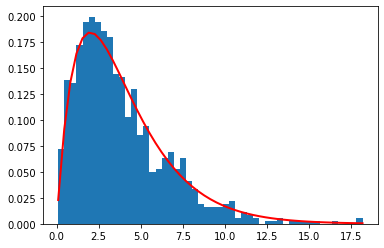

In [74]:
%matplotlib inline

import matplotlib.pyplot as plt
import scipy.special as sps

count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')
plt.show()

In [77]:
count

array([0.07188041, 0.13823155, 0.13546692, 0.17140712, 0.19352417,
       0.19905343, 0.19352417, 0.18523028, 0.17970102, 0.14376081,
       0.14099618, 0.10229135, 0.12993766, 0.08570356, 0.09399745,
       0.04976336, 0.05252799, 0.06358651, 0.06911578, 0.05252799,
       0.06358651, 0.04146947, 0.03317557, 0.01935242, 0.01658779,
       0.01658779, 0.01658779, 0.01935242, 0.02211705, 0.00552926,
       0.01105852, 0.00829389, 0.00552926, 0.        , 0.00276463,
       0.00276463, 0.00552926, 0.        , 0.00276463, 0.00276463,
       0.00276463, 0.00276463, 0.00276463, 0.        , 0.        ,
       0.00276463, 0.        , 0.        , 0.        , 0.00552926])

In [76]:
bins

array([ 0.09609095,  0.45780287,  0.81951479,  1.18122671,  1.54293863,
        1.90465055,  2.26636247,  2.6280744 ,  2.98978632,  3.35149824,
        3.71321016,  4.07492208,  4.436634  ,  4.79834592,  5.16005784,
        5.52176977,  5.88348169,  6.24519361,  6.60690553,  6.96861745,
        7.33032937,  7.69204129,  8.05375322,  8.41546514,  8.77717706,
        9.13888898,  9.5006009 ,  9.86231282, 10.22402474, 10.58573666,
       10.94744859, 11.30916051, 11.67087243, 12.03258435, 12.39429627,
       12.75600819, 13.11772011, 13.47943203, 13.84114396, 14.20285588,
       14.5645678 , 14.92627972, 15.28799164, 15.64970356, 16.01141548,
       16.37312741, 16.73483933, 17.09655125, 17.45826317, 17.81997509,
       18.18168701])

In [78]:
ignored

<BarContainer object of 50 artists>

## 2. NumPy陣列的索引和切片 (Slicing)

透過索引存取陣列元素或進行切片 (slicing)，可以使用索引值，或是 [start:stop:step] 語法取得範圍內的元素，要留意的是起始-結束範圍仍是 half-open 的，所以回傳的元素將不包含結束索引的元素。

In [79]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [86]:
a[0]

0

In [84]:
a[5:10]

array([5, 6, 7, 8, 9])

In [85]:
a[5:10:2]

array([5, 7, 9])

索引 -1 表示取得最後一個元素。

In [87]:
a[-1]

19

切片如果只有給定 step 值為 -1 的話，則代表是反向取出，元素值是從最後一筆開始取出。

In [88]:
a[::-1]

array([19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1,  0])

多維陣列的索引是分別給定各維度的索引值或範圍。

In [89]:
b = np.array([[1, 2, 3], [4, 5, 6]])
b

array([[1, 2, 3],
       [4, 5, 6]])

In [92]:
b[0, 0]

1

若沒有給定 start 或 stop 值的話則代表是取出該索引之前或之後的所有元素。若 start 和 stop 值都沒有給定的話，就是取出所有元素值。

In [101]:
b[:, 1:] #,前是第幾個list的起始; ,後是每個list中第幾個元素的起始

array([[2, 3],
       [5, 6]])

## 3. NumPy 陣列的常用屬性

|屬性|說明|
|---|---|
|shape|陣列的形狀|
|ndim|陣列的維度數目，也就是軸(axis)的數目|
|dtype|陣列元素的資料型別|
|size|陣列元素的數目|
|flat|陣列的一維迭代器|
|T|陣列轉置|
|real|陣列元素複數(complex number)的實數部分|
|imag|陣列元素複數(complex number)的虚數部分|
|data|顯示buffer物件，指向陣列資料的開始位址|
|itemsize|每個元素的記憶體使用量|
|nbytes|陣列所有元素的記憶體使用量|
|strides|往相郼元素移動時需要的byte數|

a 陣列為二維陣列，陣列形狀、維度、元素數目可透過屬性查看。

In [102]:
a = np.array([[1, 2, 3, 4, 5],
              [4, 5, 6, 7, 8]])

In [103]:
a.shape

(2, 5)

In [104]:
a.ndim

2

In [105]:
a.dtype

dtype('int64')

In [106]:
a.size

10

若將 a 陣列透過一維迭代器來查看的話，索引 6 的元素值將是 5。

In [117]:
a.flat[7]

6

轉置 (transpose) 陣列，將會在後續線性代數的單元有更多的介紹。

In [118]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6],
       [4, 7],
       [5, 8]])

x 陣列的元素為複數 (complex number)，查看 `real` 與 `imag` 屬性分別顯示數字的實部與虚部。

In [119]:
x = np.array([1+0j, 0+1j])
x

array([1.+0.j, 0.+1.j])

In [120]:
x.real

array([1., 0.])

In [121]:
x.imag

array([0., 1.])

In [122]:
# 顯示buffer物件，指向陣列資料的開始位址
x.data

b 陣列的資料型別為 `int64` 64 bit 的整數，也就是 8 byte，陣列有 3 個元素所以陣列的 `dtype`、`itemsize`、`nbytes`、`strides` 元範及結果如下。

In [123]:
b = np.array([1, 2, 3])

In [124]:
b.dtype

dtype('int64')

In [125]:
b.itemsize

8

In [126]:
b.nbytes

24

In [127]:
b.strides

(8,)